In [1]:
# step 1: build 
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

doge_df = pd.read_csv('doge-2021.csv')
metrics = doge_df.columns[1:5]


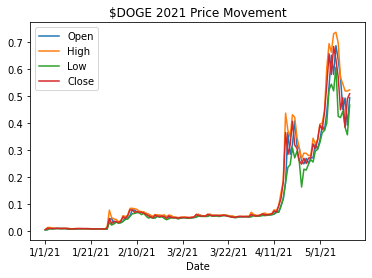

In [2]:
# lets graph this year's doge data over time

fig, ax = plt.subplots()
title = '$DOGE 2021 Price Movement'
for metric in metrics:
    ax = doge_df.plot(ax=ax, kind='line', x='Date', y=metric, legend='True', title=title)


In [3]:
# build dataset -- query tweets about DOGE from this year

# !pip install tweepy
import tweepy
import re
import math

consumer_key = 'dB3HhR7wYYGvRv96vr2D7nkVP'
consumer_secret = 'bnZwA5qDzb5S2ryb3z1Kc7HPQhooO3TVhDqp6KjacM8v98LygP'

access_token = '3395702405-imuAgWIHc5hTzHhJg4q3u19TibCK29ucR1mwD1q'
access_token_secret = 'UcCtMNRGhmLlmJFz6lWlaVeshaGClx0cmDBYJE8UdDMsB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

doge_query = []#api.search_full_archive(environment_name='dev', query='DOGE', fromDate='202101010000', maxResults=100)

#for tweet in doge_query:
    #print(tweet.text)

In [4]:
from datetime import datetime
import snscrape.modules.twitter as sntwitter

months = [31,28,31,30,31,30,31,31,30,31,30,31]

def sub_days(start,days):
    month = int(start[5:7])
    day = int(start[8:10])
    s = 0
    for i in range(0,month-1):
        s = s + months[i]
    
    s = s + day - days

    m = 0
    while s>0:
        s = s - months[m]
        m = m+1
        
    s = months[m-1] + s
    
    
    if(m<10):
        m = '0'+str(m)
    else:
        m = str(m)
        
    if(s<10):
        s = '0'+str(s)
    else:
        s = str(s)   
    
        
    return str(start[0:5]+m+'-'+s)


# Using TwitterSearchScraper to scrape data and append tweets to list
# Note: D = # of days past to be scraping from
# Note: I = # of tweets to scrape from each day
# Note: inc = number of days by which to increment
now = datetime.today().strftime('%Y-%m-%d')
D = 100
I = 100
inc = 1

count = 0
while count <= D:
    count = count + inc
    curr = sub_days(now,count)
    prev = sub_days(now,count+inc)

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('DOGE since:'+prev+' until:'+curr).get_items()):
        if i>I:
            break
            
        doge_query.append(tweet)

    
#for tweet in doge_query:
    #print(tweet.content)

In [5]:
# sentiment analysis 

# iterate through tweets, for each tweet give it a sentiment (negative or positive).
# if its hard to determine, just skip the tweet

def set_senti():
    d = {}
    
    pos = open("goods.txt","r")
    while True:
        word = pos.readline()
        if not word:
            break
        else:
            d[word.rstrip()] = 1
    pos.close()

    neg = open("bads.txt","r")
    while True:
        word = neg.readline()
        if not word:
            break
        else:
            d[word.rstrip()] = -1
    neg.close()
    
    return d

senti_array = set_senti()

def compute_senti(tweet):
    score = 0
    tweet = tweet.content
    
    for word in tweet.split(" "):
        word.lower()
        if re.match("#",word):
            word = word[1:]
            
        if re.search("[\.|!|,]$",word):
            word = word[:-1]

        if (word in senti_array):
            score += senti_array[word]
            
    if score != 0:
        return int(abs(score)/score)
    else:
        return 0


def compute_infl(tweet):
    # influence ranges from 0 - infinity
    return int(math.log(tweet.user.followersCount * ((tweet.retweetCount+1)**2) + 1))

# build an array that maps tweets to sentiments in (tweet,sentiment_weight) form
tweets = []
date_weight = {}

for tweet in doge_query:
    sentiment = compute_senti(tweet)    # either -1 (negative) or 1 (positive)
    influence = compute_infl(tweet)
    w_sentiment = sentiment * influence
    
    tweets.append((tweet,w_sentiment))
    
    date = str(tweet.date)[0:10]
    if(date in date_weight):
        date_weight[date] = date_weight[date] + w_sentiment
    else:
        date_weight[date] = w_sentiment
        
print(date_weight)
    
# iterate through days, for each day compute the sum of w_sentiments (if its negative, more people had negative things to say, if its positive, people had good things to say)

# this is just a skeleton, day and days are both undefined rn
# for day in days:
  #  daily_sentiment = sum(w_sentiment) 

# plot daily sentiment over time, compare it to doge data


{'2021-05-16': 98, '2021-05-15': 105, '2021-05-14': 73, '2021-05-13': 53, '2021-05-12': 24, '2021-05-11': 34, '2021-05-10': 24, '2021-05-09': 64, '2021-05-08': 38, '2021-05-07': 42, '2021-05-06': 42, '2021-05-05': 82, '2021-05-04': 36, '2021-05-03': 23, '2021-05-02': 119, '2021-05-01': 20, '2021-04-30': 23, '2021-04-29': 90, '2021-04-28': 87, '2021-04-27': 101, '2021-04-26': 69, '2021-04-25': 21, '2021-04-24': 88, '2021-04-23': 81, '2021-04-22': 28, '2021-04-21': 60, '2021-04-20': 24, '2021-04-19': 90, '2021-04-18': -17, '2021-04-17': 73, '2021-04-16': 16, '2021-04-15': 134, '2021-04-14': 58, '2021-04-13': 94, '2021-04-12': 116, '2021-04-11': 68, '2021-04-10': 47, '2021-04-09': -86, '2021-04-08': 75, '2021-04-07': 60, '2021-04-06': 45, '2021-04-05': -192, '2021-04-04': 86, '2021-04-03': 155, '2021-04-02': 69, '2021-04-01': 79, '2021-03-31': 82, '2021-03-30': 86, '2021-03-29': 128, '2021-03-28': 7, '2021-03-27': 18, '2021-03-26': 61, '2021-03-25': 12, '2021-03-24': 15, '2021-03-23': -14

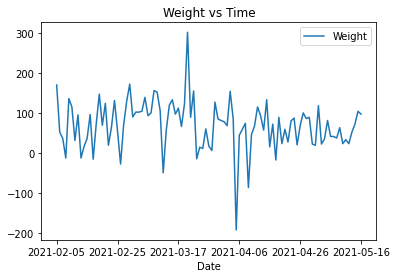

In [6]:
weight_data = {'Date':[],'Weight':[]}
for k in date_weight:
    weight_data['Date'].insert(0,k)
    weight_data['Weight'].insert(0,date_weight[k])
    
senti_df = pd.DataFrame.from_dict(weight_data)
fig, ax = plt.subplots()
ax = senti_df.plot(ax=ax, kind='line', x='Date', y='Weight', title='Weight vs Time')

In [34]:
#print(senti_df['Weight'][:-2])
#print(doge_df['Open'][35:])
cols = ['Open', 'Close']

offset_corr = pd.DataFrame(index = range(8),columns = cols)

for offset in range(8):
    #print("Offset is " + str(offset))
    senti_pct_df = senti_df['Weight'][:-2 - offset].pct_change()
    for col in cols:
        doge_pct_df = doge_df[col][35 + offset:].pct_change()
        #plt.scatter(senti_pct_df, doge_pct_df)
        #plt.show()
        correlation = senti_pct_df.corr(doge_pct_df)
        offset_corr[col][offset] = correlation
        #print("Correlation with "+col+" is " + str(correlation))
        
print(offset_corr)


       Open     Close
0   0.15297 -0.037252
1   0.13541  0.000665
2  0.137768 -0.029116
3  0.180238 -0.033917
4  0.180979 -0.042043
5  0.186838 -0.037935
6  0.191936 -0.042224
7   0.19384 -0.043981


A Pearson's correlation coefficient of between $\pm 0.26$ is considered small correlation.